In [1]:
# Loading the packages
if(!require("caret")){install.packages("caret")}
if(!require("tidyverse")){install.packages("tidyverse")}
if(!require("ISLR")){install.packages("ISLR")}
if(!require("boot")){install.packages("boot")}
if(!require("MASS")){ install.packages("MASS")}
if(!require("leaps")){ install.packages("leaps")}
if(!require("glmnet")){ install.packages("glmnet")}
if(!require("e1071")){ install.packages("e1071")}
if(!require("pROC")){ install.packages("pROC")}
if(!require("class")){ install.packages("class")}
if(!require("reshape2")){ install.packages("reshape2")}
library(boot)
library(caret)  # Package for machine learning modelling functions.
library(tidyverse)
library(ISLR)
library(MASS)
library(leaps)
library(glmnet)
library(e1071) # If you face an issue on mac for installing this package use https://wlu.syzygy.ca platform for practice
library(pROC)
library(class)
library(reshape2)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr:

In [2]:
if(!require("lmvar")) {install.packages("lmvar")}
if(!require("splines")) {install.packages("splines")}
if(!require("gam")){install.packages("gam")}
if(!require("rpart")) {install.packages("rpart")}
if(!require("rpart.plot")) {install.packages("rpart.plot")}
if(!require("randomForest")) {install.packages("randomForest")}
if(!require("gbm")) {install.packages("gbm")}
library(lmvar)
library(splines)
library(gam)
library(rpart)
library(rpart.plot)
library(randomForest)
library(gbm)
if(!require("neuralnet")) {install.packages("neuralnet")}
if(!require("keras")) {install.packages("keras")} # this would install required packages, tensorflow and reticulate 
if(!require("quantmod")) {install.packages("quantmod")}
library(neuralnet)
library(tensorflow)
library(keras)
library(quantmod)

Loading required package: lmvar

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmvar’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘miscTools’, ‘sandwich’, ‘matrixcalc’, ‘maxLik’


Loading required package: splines

Loading required package: gam

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gam’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: randomForest

Warning message in library(p

In [3]:
# Loading datasets

In [4]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

In [5]:
train <- read_csv("hypo_train.csv")
test <- read_csv("hypo_test.csv")
head(train)
head(test)
str(train)
str(test)

Rows: 2800 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 972 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Female,On_thyroxine,Query_on_thyroxine,On_anti_medi,Sick,Pregnant,Surgery,I131_treatment,Query_hypo,Query_hyper,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Hypo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125,1,1.14,1,109,0
23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102,0,NA,0,NA,0
46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NA,1,109,1,0.91,1,120,0
70,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175,0,NA,0,NA,0
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61,1,0.87,1,70,0
18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.03,0,NA,1,183,1,1.30,1,141,0


Age,Female,On_thyroxine,Query_on_thyroxine,On_anti_medi,Sick,Pregnant,Surgery,I131_treatment,Query_hypo,Query_hyper,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Hypo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,0,NA,0,NA,0,NA,0,NA,0
63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.50,1,2.5,1,108,1,0.96,1,113,0
25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.60,1,2.4,1,61,1,0.82,1,75,0
53,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.25,1,2.1,1,145,1,1.03,1,141,0
92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.70,1,1.3,1,120,1,0.84,1,143,0
67,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.81,0,NA,1,84,1,0.83,1,101,0


spec_tbl_df [2,800 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : num [1:2800] 1 1 0 1 1 1 1 1 1 0 ...
 $ On_thyroxine      : num [1:2800] 0 0 0 1 0 1 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Pregnant          : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Lithium           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:2800] 0 0 0 0 0 0 0 0 1 0 ...
 $ Hypopituitary     : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : nu

# 新段落

In [6]:
for (i in 2:17){
    train[[i]] <- factor(train[[i]])
    test[[i]] <- factor(test[[i]])
}
col <- c(19, 21, 23, 25, 27)
for (i in col){
    train[[i]] <- factor(train[[i]])
    test[[i]] <- factor(test[[i]])
}
levels(test$Hypopituitary) <- c(0,1)

In [7]:
#train$Hyper <- factor(train$Hyper)
#test$Hyper <- factor(test$Hyper)

In [8]:
str(train)
str(test)

spec_tbl_df [2,800 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 1 ...
 $ On_thyroxine      : Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 1 ...
 $ Query_on_thyroxine: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ On_anti_medi      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sick              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pregnant          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Surgery           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ I131_treatment    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hypo        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hyper       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Lithium           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Goitre            : Factor w/ 2 level

In [9]:
train2 <- train %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
test2 <- test %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
str(train2)
str(test2)

tibble [2,800 × 22] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 1 ...
 $ On_thyroxine      : Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 1 ...
 $ Query_on_thyroxine: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ On_anti_medi      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sick              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pregnant          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Surgery           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ I131_treatment    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hypo        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hyper       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Lithium           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Goitre            : Factor w/ 2 levels "0","1": 1 1 1 

In [10]:
train3 <- na.omit(train2)
test3 <- na.omit(test2)

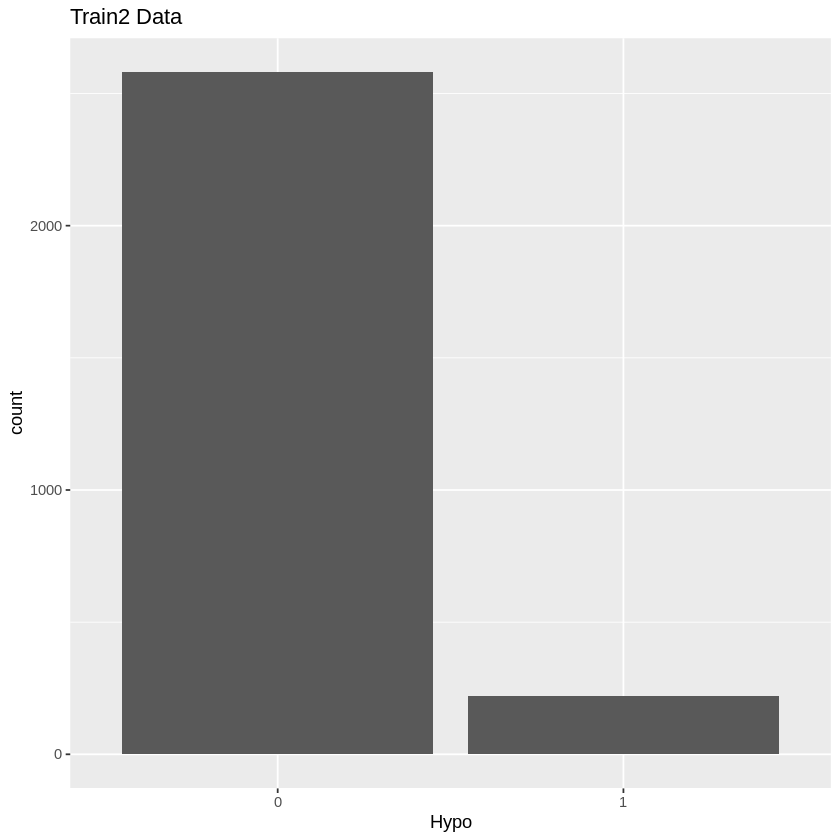

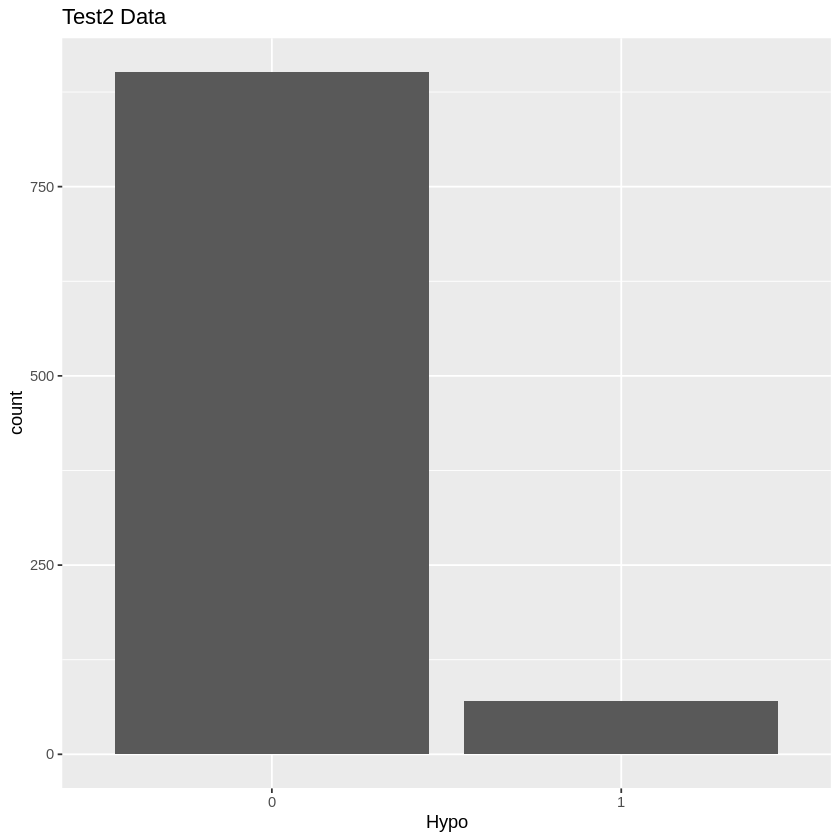

In [11]:
ggplot(train2, mapping = aes(Hypo)) +
  stat_count() +
  ggtitle("Train2 Data")
ggplot(test2, mapping = aes(Hypo)) +
  stat_count() +
  ggtitle("Test2 Data")

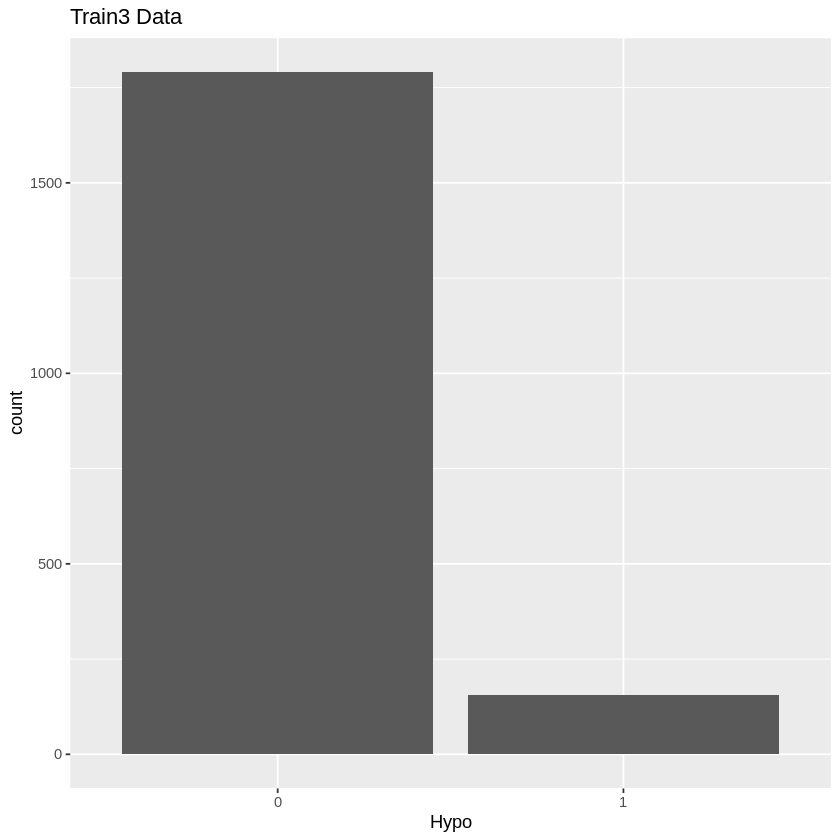

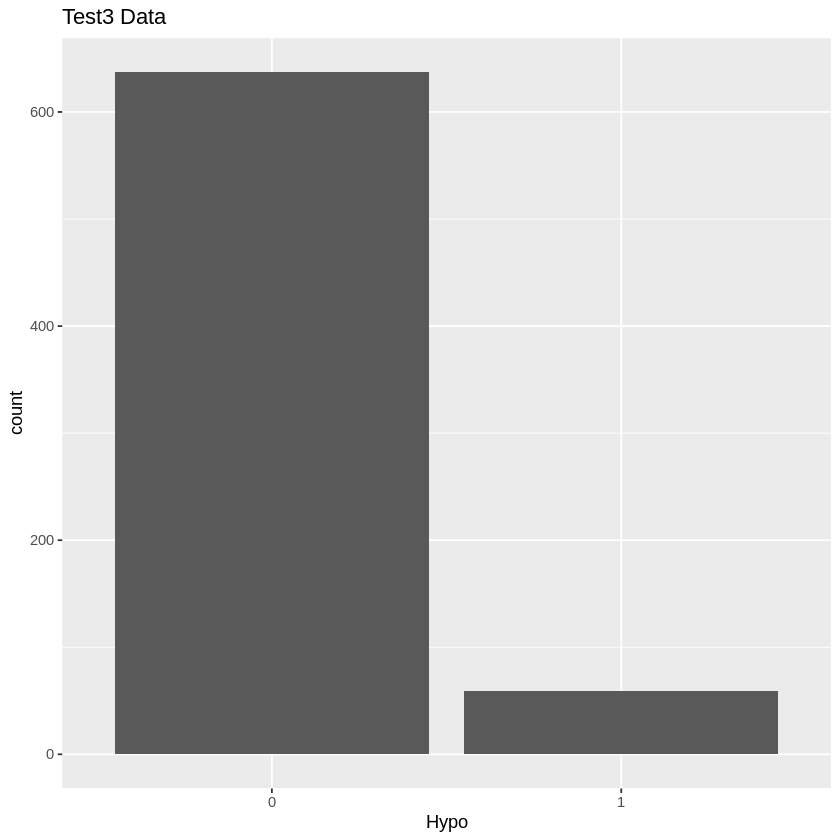

In [12]:
ggplot(train3, mapping = aes(Hypo)) +
  stat_count() +
  ggtitle("Train3 Data")
ggplot(test3, mapping = aes(Hypo)) +
  stat_count() +
  ggtitle("Test3 Data")

In [13]:
# Logistic

In [14]:
logit <- glm(Hypo~., data = train2, family = "binomial")
summary(logit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.1919  -0.1348  -0.0642   5.6001  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.469e-01  3.776e+00   0.065    0.948    
Age                 -7.307e-03  8.229e-03  -0.888    0.375    
Female1              3.916e-01  3.354e-01   1.168    0.243    
On_thyroxine1       -1.840e+01  4.486e+00  -4.102 4.09e-05 ***
Query_on_thyroxine1  4.545e-01  1.300e+00   0.350    0.727    
On_anti_medi1       -1.902e-01  1.293e+00  -0.147    0.883    
Sick1                1.824e-01  5.825e-01   0.313    0.754    
Pregnant1           -1.435e+01  1.696e+03  -0.008    0.993    
Surgery1            -7.061e+01  3.950e+02  -0.179    0.858    
I131_treatment1     -1.067e+01  1.376e+02  -0.078    0.938    
Query_hypo1          4.666e-02  6.116e-01   0.076    0.939    
Query_hyper1         3.681e-01  6.810e-01   0.54

In [15]:
pred.logit <- predict(logit, newdata = test2, type = "response")

In [16]:
contrasts(train2$Hypo)

,1
0,0
1,1


In [17]:
pred.labels = ifelse(pred.logit > 0.5, 1, 0) 
pred.labels = as.factor(pred.labels)
head(pred.labels)

1    2    3    4    5    6 
<NA>    0    0    0    0 <NA> 
Levels: 0 1

In [18]:
confusionMatrix(pred.labels, test2$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 633  12
         1   4  47
                                          
               Accuracy : 0.977           
                 95% CI : (0.9629, 0.9868)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 7.983e-12       
                                          
                  Kappa : 0.8421          
                                          
 Mcnemar's Test P-Value : 0.08012         
                                          
            Sensitivity : 0.9937          
            Specificity : 0.7966          
         Pos Pred Value : 0.9814          
         Neg Pred Value : 0.9216          
             Prevalence : 0.9152          
         Detection Rate : 0.9095          
   Detection Prevalence : 0.9267          
      Balanced Accuracy : 0.8952          
                                          
       'Positive' Class : 0               
                              

In [19]:
mean(pred.labels != test2$Hypo, na.rm = TRUE)

[1] 0.02298851

Setting levels: control = 0, case = 1

Setting direction: controls < cases



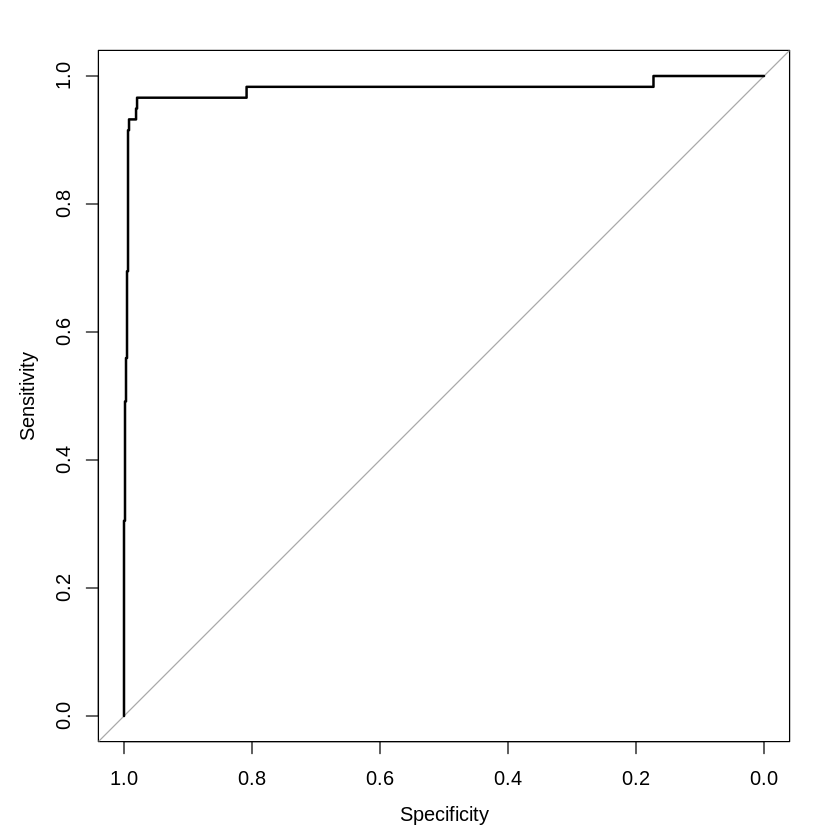

In [20]:
g <- roc(test2$Hypo, pred.logit)
plot(g)

In [21]:
logit2 <- glm(Hypo~., data = train3, family = "binomial")
summary(logit2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ ., family = "binomial", data = train3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.1919  -0.1348  -0.0642   5.6001  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.469e-01  3.776e+00   0.065    0.948    
Age                 -7.307e-03  8.229e-03  -0.888    0.375    
Female1              3.916e-01  3.354e-01   1.168    0.243    
On_thyroxine1       -1.840e+01  4.486e+00  -4.102 4.09e-05 ***
Query_on_thyroxine1  4.545e-01  1.300e+00   0.350    0.727    
On_anti_medi1       -1.902e-01  1.293e+00  -0.147    0.883    
Sick1                1.824e-01  5.825e-01   0.313    0.754    
Pregnant1           -1.435e+01  1.696e+03  -0.008    0.993    
Surgery1            -7.061e+01  3.950e+02  -0.179    0.858    
I131_treatment1     -1.067e+01  1.376e+02  -0.078    0.938    
Query_hypo1          4.666e-02  6.116e-01   0.076    0.939    
Query_hyper1         3.681e-01  6.810e-01   0.54

In [22]:
pred.logit2 <- predict(logit2, newdata = test3, type = "response")

In [23]:
pred.labels2 = ifelse(pred.logit2 > 0.5, 1, 0) 
pred.labels2 = as.factor(pred.labels2)
head(pred.labels2)

1 2 3 4 5 6 
0 0 0 0 0 1 
Levels: 0 1

In [24]:
confusionMatrix(pred.labels2, test3$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 633  12
         1   4  47
                                          
               Accuracy : 0.977           
                 95% CI : (0.9629, 0.9868)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 7.983e-12       
                                          
                  Kappa : 0.8421          
                                          
 Mcnemar's Test P-Value : 0.08012         
                                          
            Sensitivity : 0.9937          
            Specificity : 0.7966          
         Pos Pred Value : 0.9814          
         Neg Pred Value : 0.9216          
             Prevalence : 0.9152          
         Detection Rate : 0.9095          
   Detection Prevalence : 0.9267          
      Balanced Accuracy : 0.8952          
                                          
       'Positive' Class : 0               
                              

In [25]:
(logit.test.err <- mean(pred.labels2 != test3$Hypo, na.rm = TRUE))

[1] 0.02298851

Setting levels: control = 0, case = 1

Setting direction: controls < cases



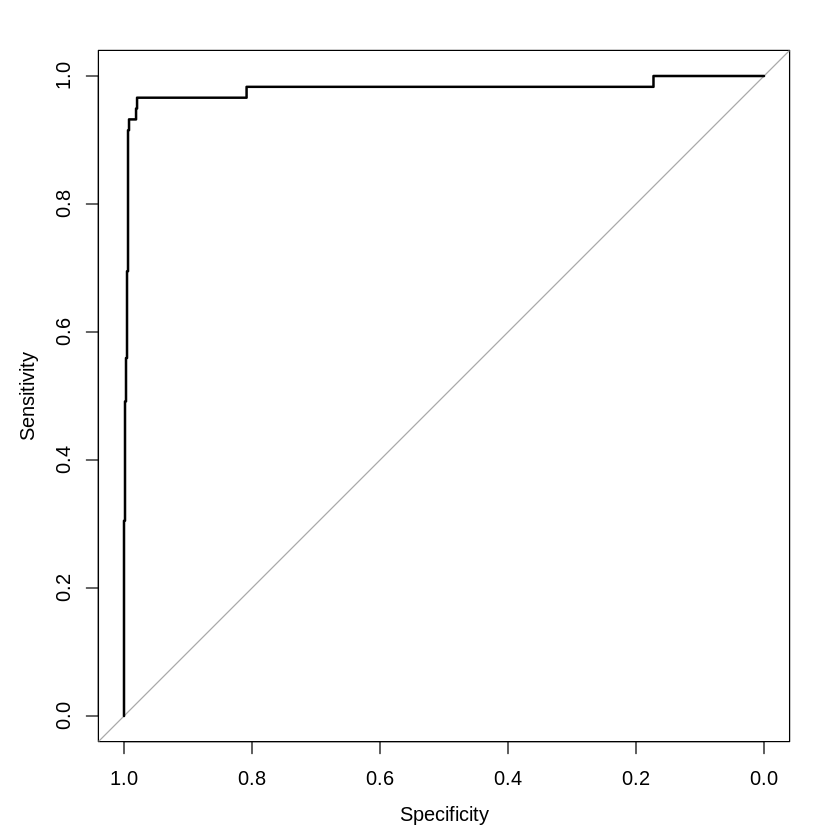

In [26]:
g2 <- roc(test3$Hypo, pred.logit2)
plot(g2)

In [27]:
logit3 <- glm(Hypo~On_thyroxine+TSH, data = train3, family = "binomial")
summary(logit3)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ On_thyroxine + TSH, family = "binomial", 
    data = train3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.2609  -0.2151  -0.1833   4.7681  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.11396    0.17948 -22.921  < 2e-16 ***
On_thyroxine1 -11.08510    2.51775  -4.403 1.07e-05 ***
TSH             0.39500    0.03043  12.981  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1091.57  on 1946  degrees of freedom
Residual deviance:  538.62  on 1944  degrees of freedom
AIC: 544.62

Number of Fisher Scoring iterations: 25


In [28]:
pred.logit3 <- predict(logit3, newdata = test3, type = "response")

In [29]:
pred.labels3 = ifelse(pred.logit3 > 0.5, 1, 0) 
pred.labels3 = as.factor(pred.labels3)
head(pred.labels3)

1 2 3 4 5 6 
0 0 0 0 0 1 
Levels: 0 1

In [30]:
confusionMatrix(pred.labels3, test3$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 633  21
         1   4  38
                                          
               Accuracy : 0.9641          
                 95% CI : (0.9474, 0.9766)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 1.966e-07       
                                          
                  Kappa : 0.7337          
                                          
 Mcnemar's Test P-Value : 0.001374        
                                          
            Sensitivity : 0.9937          
            Specificity : 0.6441          
         Pos Pred Value : 0.9679          
         Neg Pred Value : 0.9048          
             Prevalence : 0.9152          
         Detection Rate : 0.9095          
   Detection Prevalence : 0.9397          
      Balanced Accuracy : 0.8189          
                                          
       'Positive' Class : 0               
                              

In [31]:
(logit.test.err <- mean(pred.labels3 != test3$Hypo, na.rm = TRUE))

[1] 0.03591954

In [33]:
# LDA

In [34]:
lda <- lda(Hypo~., data = train2)
lda

Call:
lda(Hypo ~ ., data = train2)

Prior probabilities of groups:
         0          1 
0.91936312 0.08063688 

Group means:
       Age   Female1 On_thyroxine1 Query_on_thyroxine1 On_anti_medi1      Sick1
0 53.23352 0.6502793    0.10055866         0.008938547   0.013966480 0.04525140
1 53.01911 0.7515924    0.01910828         0.012738854   0.006369427 0.05732484
   Pregnant1    Surgery1 I131_treatment1 Query_hypo1 Query_hyper1    Lithium1
0 0.01787709 0.013407821     0.017318436  0.04581006   0.06368715 0.005586592
1 0.00000000 0.006369427     0.006369427  0.08917197   0.05095541 0.006369427
      Goitre1     Tumor1 Hypopituitary1     Psych1       TSH       T3       TT4
0 0.008379888 0.02234637   0.0005586592 0.06871508  1.808134 2.059609 111.78939
1 0.000000000 0.02547771   0.0000000000 0.03821656 33.654140 1.505096  74.22675
       T4U       FTI
0 0.997505 113.10503
1 1.012229  74.61975

Coefficients of linear discriminants:
                              LD1
Age                 -0.

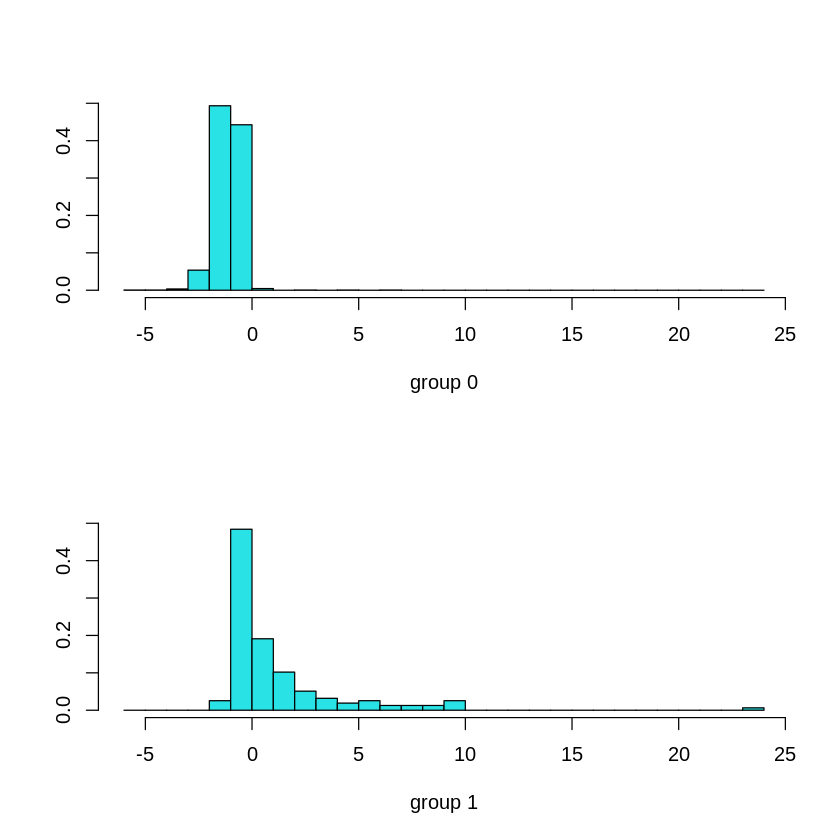

In [35]:
plot(lda)

In [36]:
pred.lda <- predict(lda, newdata = test2)
names(pred.lda)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

[1] "class"     "posterior" "x"

In [37]:
confusionMatrix(pred.lda$class, test2$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 636  36
         1   1  23
                                          
               Accuracy : 0.9468          
                 95% CI : (0.9275, 0.9623)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 0.0009729       
                                          
                  Kappa : 0.5312          
                                          
 Mcnemar's Test P-Value : 2.276e-08       
                                          
            Sensitivity : 0.9984          
            Specificity : 0.3898          
         Pos Pred Value : 0.9464          
         Neg Pred Value : 0.9583          
             Prevalence : 0.9152          
         Detection Rate : 0.9138          
   Detection Prevalence : 0.9655          
      Balanced Accuracy : 0.6941          
                                          
       'Positive' Class : 0               
                              

In [38]:
mean(pred.lda$class != test2$Hypo, na.rm = TRUE)

[1] 0.05316092

In [39]:
lda2 <- lda(Hypo~., data = train3)
lda2

Call:
lda(Hypo ~ ., data = train3)

Prior probabilities of groups:
         0          1 
0.91936312 0.08063688 

Group means:
       Age   Female1 On_thyroxine1 Query_on_thyroxine1 On_anti_medi1      Sick1
0 53.23352 0.6502793    0.10055866         0.008938547   0.013966480 0.04525140
1 53.01911 0.7515924    0.01910828         0.012738854   0.006369427 0.05732484
   Pregnant1    Surgery1 I131_treatment1 Query_hypo1 Query_hyper1    Lithium1
0 0.01787709 0.013407821     0.017318436  0.04581006   0.06368715 0.005586592
1 0.00000000 0.006369427     0.006369427  0.08917197   0.05095541 0.006369427
      Goitre1     Tumor1 Hypopituitary1     Psych1       TSH       T3       TT4
0 0.008379888 0.02234637   0.0005586592 0.06871508  1.808134 2.059609 111.78939
1 0.000000000 0.02547771   0.0000000000 0.03821656 33.654140 1.505096  74.22675
       T4U       FTI
0 0.997505 113.10503
1 1.012229  74.61975

Coefficients of linear discriminants:
                              LD1
Age                 -0.

In [40]:
pred.lda2 <- predict(lda2, newdata = test3)
names(pred.lda2)

[1] "class"     "posterior" "x"

In [41]:
confusionMatrix(pred.lda2$class, test3$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 636  36
         1   1  23
                                          
               Accuracy : 0.9468          
                 95% CI : (0.9275, 0.9623)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 0.0009729       
                                          
                  Kappa : 0.5312          
                                          
 Mcnemar's Test P-Value : 2.276e-08       
                                          
            Sensitivity : 0.9984          
            Specificity : 0.3898          
         Pos Pred Value : 0.9464          
         Neg Pred Value : 0.9583          
             Prevalence : 0.9152          
         Detection Rate : 0.9138          
   Detection Prevalence : 0.9655          
      Balanced Accuracy : 0.6941          
                                          
       'Positive' Class : 0               
                              

In [42]:
(lda.test.err <- mean(pred.lda2$class != test3$Hypo, na.rm = TRUE))

[1] 0.05316092

In [44]:
# KNN

In [45]:
KNN <- knn(train3, test3, train3$Hypo, k = 10)
confusionMatrix(KNN, test3$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 635  25
         1   2  34
                                          
               Accuracy : 0.9612          
                 95% CI : (0.9441, 0.9743)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 1.140e-06       
                                          
                  Kappa : 0.6963          
                                          
 Mcnemar's Test P-Value : 2.297e-05       
                                          
            Sensitivity : 0.9969          
            Specificity : 0.5763          
         Pos Pred Value : 0.9621          
         Neg Pred Value : 0.9444          
             Prevalence : 0.9152          
         Detection Rate : 0.9124          
   Detection Prevalence : 0.9483          
      Balanced Accuracy : 0.7866          
                                          
       'Positive' Class : 0               
                              

In [46]:
(knn.test.err <- mean(KNN != test3$Hypo))

[1] 0.0387931

In [47]:
test.err <- data.frame("Test Error" = c(logit.test.err, lda.test.err, knn.test.err))
rownames(test.err) <- c("Logit", "LDA", "KNN")
test.err

,Test.Error
,<dbl>
Logit,0.03591954
LDA,0.05316092
KNN,0.03879310


In [48]:
# 10-fold CV

In [49]:
control <- trainControl(method="cv", number=10)

In [50]:
set.seed(8)
# Logit
logit.cv <- caret::train(Hypo~., data=train3, method="glm",family="binomial", trControl=control)
# LDA
lda.cv <- caret::train(Hypo~., data=train3, method="lda", trControl=control)
# kNN
knn.cv <- caret::train(Hypo~., data=train3, method="knn", trControl=control)

results <- resamples(list(LR=logit.cv, LDA=lda.cv, KNN=knn.cv))
summary(results)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitt


Call:
summary.resamples(object = results)

Models: LR, LDA, KNN 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.9692308 0.9756410 0.9794872 0.9799709 0.9845361 0.9897436    0
LDA 0.9282051 0.9384615 0.9435897 0.9412547 0.9435897 0.9536082    1
KNN 0.9333333 0.9384615 0.9408803 0.9471081 0.9487179 0.9793814    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.7834136 0.8220058 0.8509724 0.8514031 0.8806888 0.9319134    0
LDA 0.2762460 0.3796394 0.4548920 0.4143668 0.4548920 0.5516179    1
KNN 0.3557814 0.3919770 0.4828096 0.5127086 0.5504563 0.8353840    0


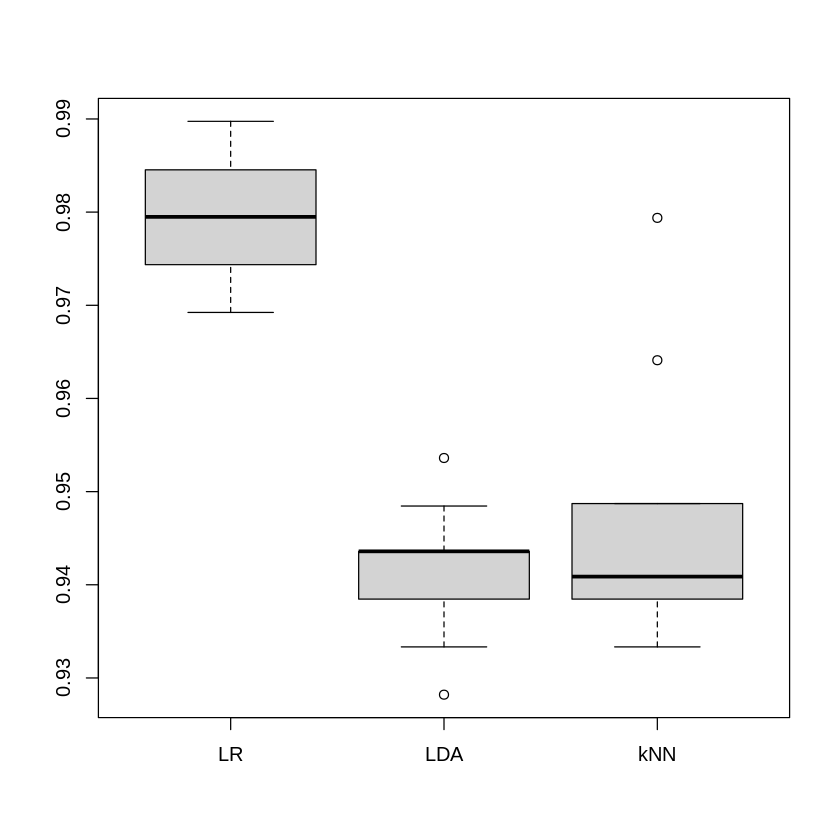

In [51]:
boxplot(results$values[,"LR~Accuracy"],results$values[,"LDA~Accuracy"], results$values[,"KNN~Accuracy"], names=c("LR","LDA","kNN"))

In [53]:
# LOOCV

In [54]:
control <- trainControl(method="LOOCV")

In [55]:
logit.loocv <- caret::train(Hypo~., data = train3, method = "glm", family = "binomial", trControl = control)
lda.loocv <- caret::train(Hypo~., data = train3, method = "lda", trControl = control)
knn.loocv <- caret::train(Hypo~., data = train3, method = "knn", trControl = control)
logit.loocv
lda.loocv
knn.loocv

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results:

  Accuracy   Kappa    
  0.9763739  0.8208781


Linear Discriminant Analysis 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results:

  Accuracy   Kappa   
  0.9409044  0.416998


k-Nearest Neighbors 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9481253  0.5424548
  7  0.9476117  0.5325968
  9  0.9455573  0.5066833

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

In [57]:
# Subset Selection

In [58]:
train4 <- read_csv("hypo_train.csv")
test4 <- read_csv("hypo_test.csv")

Rows: 2800 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 972 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [59]:
train4 <- train4 %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
test4 <- test4 %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))

In [60]:
#train4$Hypo <- factor(train4$Hypo)
#test4$Hypo <- factor(test4$Hypo)
str(train4)
str(test4)

tibble [2,800 × 22] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : num [1:2800] 1 1 0 1 1 1 1 1 1 0 ...
 $ On_thyroxine      : num [1:2800] 0 0 0 1 0 1 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Pregnant          : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Lithium           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:2800] 0 0 0 0 0 0 0 0 1 0 ...
 $ Hypopituitary     : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : num [1:2800] 0 0 0 

In [61]:
set.seed(8)
fit.sub <- regsubsets(Hypo ~ ., data = train4, nvmax = 21)
fit.sub.sum<-summary(fit.sub)
fit.sub.sum

Subset selection object
Call: regsubsets.formula(Hypo ~ ., data = train4, nvmax = 21)
21 Variables  (and intercept)
                   Forced in Forced out
Age                    FALSE      FALSE
Female                 FALSE      FALSE
On_thyroxine           FALSE      FALSE
Query_on_thyroxine     FALSE      FALSE
On_anti_medi           FALSE      FALSE
Sick                   FALSE      FALSE
Pregnant               FALSE      FALSE
Surgery                FALSE      FALSE
I131_treatment         FALSE      FALSE
Query_hypo             FALSE      FALSE
Query_hyper            FALSE      FALSE
Lithium                FALSE      FALSE
Goitre                 FALSE      FALSE
Tumor                  FALSE      FALSE
Hypopituitary          FALSE      FALSE
Psych                  FALSE      FALSE
TSH                    FALSE      FALSE
T3                     FALSE      FALSE
TT4                    FALSE      FALSE
T4U                    FALSE      FALSE
FTI                    FALSE      FALSE
1 su

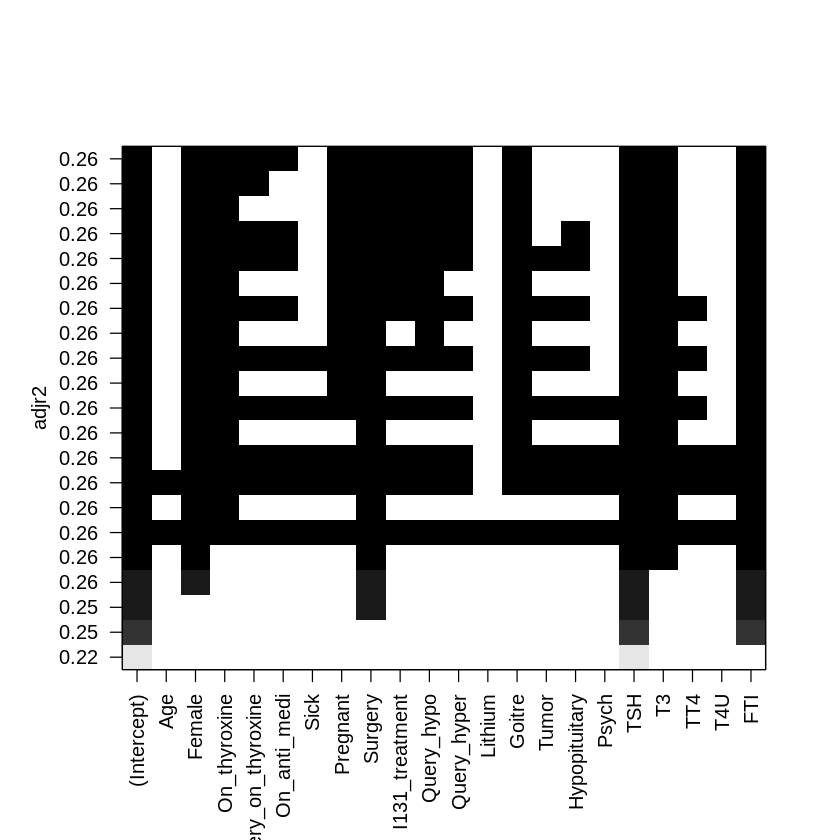

In [62]:
plot(fit.sub, scale='adjr2')

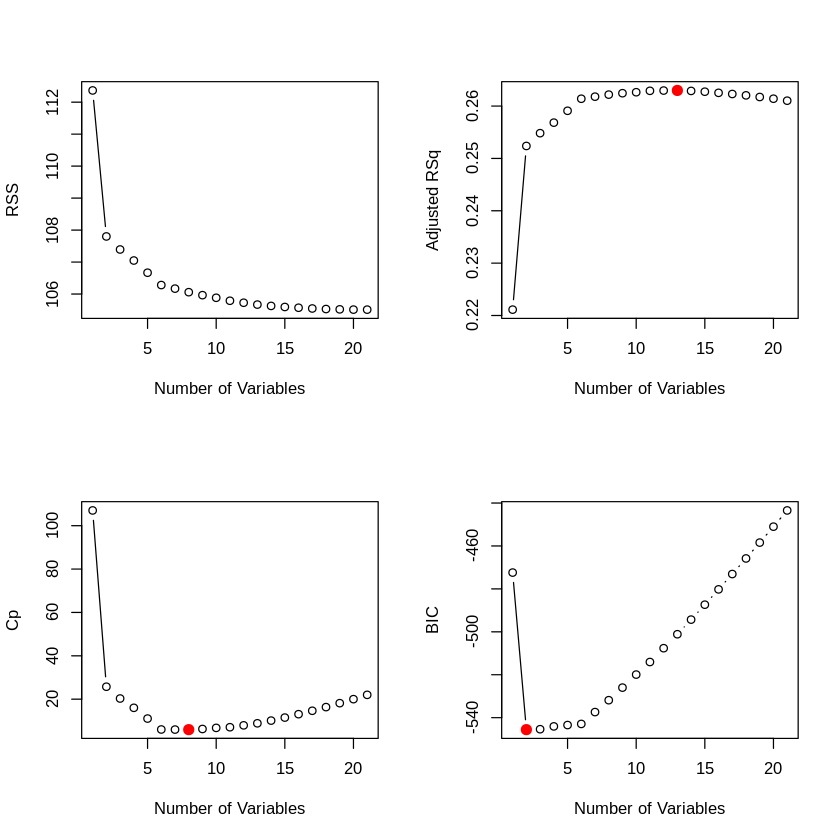

In [63]:
par(mfrow = c(2, 2))
plot(fit.sub.sum$rss, xlab = "Number of Variables", ylab = "RSS", type = "b")

plot(fit.sub.sum$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")
best.adjr2 = which.max(fit.sub.sum$adjr2)
points(best.adjr2, fit.sub.sum$adjr2[best.adjr2],
       col = "red",cex = 2, pch = 20)

plot(fit.sub.sum$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')
best.cp = which.min(fit.sub.sum$cp)
points(best.cp, fit.sub.sum$cp[best.cp], 
       col = "red", cex = 2, pch = 20)

plot(fit.sub.sum$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')
best.bic = which.min(fit.sub.sum$bic)
points(best.bic, fit.sub.sum$bic[best.bic], 
       col = "red", cex = 2, pch = 20)

In [64]:
set.seed(8)
fit.sub2 <- regsubsets(Hypo ~ ., data = train4, nvmax = 14)
fit.sub.sum2<-summary(fit.sub2)
fit.sub.sum2

Subset selection object
Call: regsubsets.formula(Hypo ~ ., data = train4, nvmax = 14)
21 Variables  (and intercept)
                   Forced in Forced out
Age                    FALSE      FALSE
Female                 FALSE      FALSE
On_thyroxine           FALSE      FALSE
Query_on_thyroxine     FALSE      FALSE
On_anti_medi           FALSE      FALSE
Sick                   FALSE      FALSE
Pregnant               FALSE      FALSE
Surgery                FALSE      FALSE
I131_treatment         FALSE      FALSE
Query_hypo             FALSE      FALSE
Query_hyper            FALSE      FALSE
Lithium                FALSE      FALSE
Goitre                 FALSE      FALSE
Tumor                  FALSE      FALSE
Hypopituitary          FALSE      FALSE
Psych                  FALSE      FALSE
TSH                    FALSE      FALSE
T3                     FALSE      FALSE
TT4                    FALSE      FALSE
T4U                    FALSE      FALSE
FTI                    FALSE      FALSE
1 su

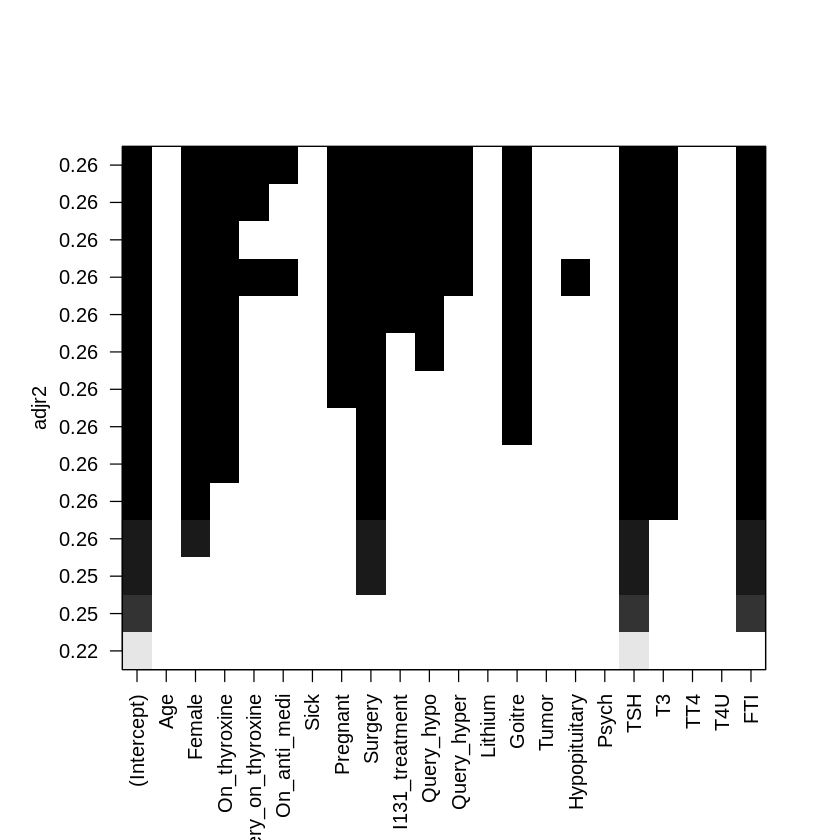

In [65]:
plot(fit.sub2, scale='adjr2')

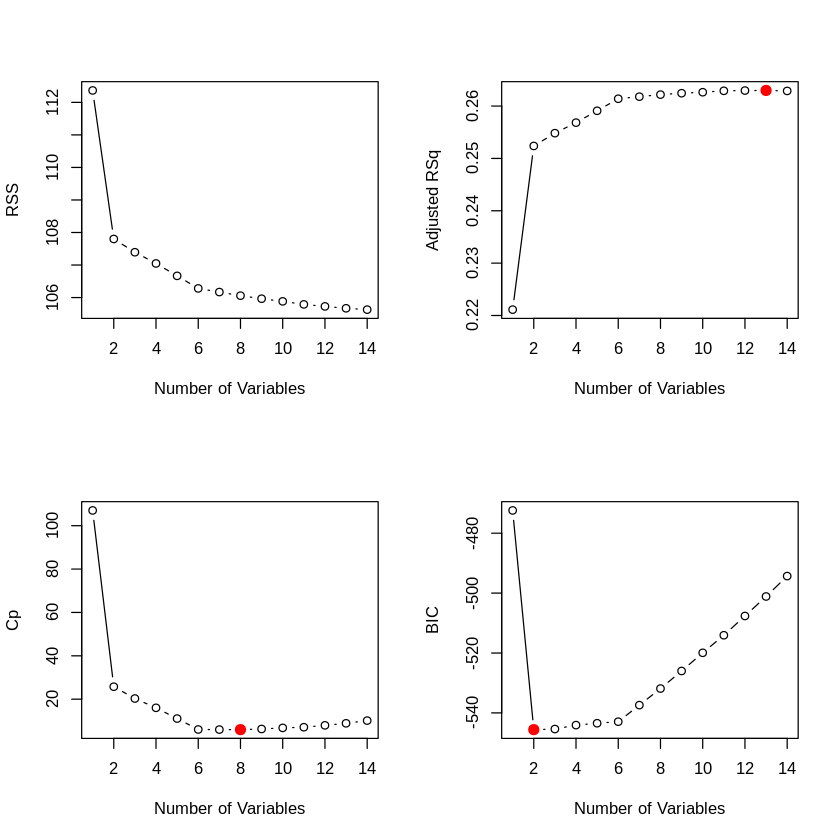

In [66]:
par(mfrow = c(2, 2))
plot(fit.sub.sum2$rss, xlab = "Number of Variables", ylab = "RSS", type = "b")

plot(fit.sub.sum2$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")
best.adjr22 = which.max(fit.sub.sum2$adjr2)
points(best.adjr22, fit.sub.sum2$adjr2[best.adjr22],
       col = "red",cex = 2, pch = 20)

plot(fit.sub.sum2$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')
best.cp2 = which.min(fit.sub.sum2$cp)
points(best.cp2, fit.sub.sum2$cp[best.cp2], 
       col = "red", cex = 2, pch = 20)

plot(fit.sub.sum2$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')
best.bic2 = which.min(fit.sub.sum2$bic)
points(best.bic2, fit.sub.sum2$bic[best.bic2], 
       col = "red", cex = 2, pch = 20)

In [67]:
set.seed(8)
fit.fwd <- regsubsets(Hypo~., data = train4, nvmax = 14, method = "forward")
fit.bwd <- regsubsets(Hypo~., data = train4, nvmax = 14, method = "backward")

In [68]:
comparison <- data.frame(
    "Cp" = c(which.min(summary(fit.sub2)$cp), which.min(summary(fit.fwd)$cp), which.min(summary(fit.bwd)$cp)),
    "BIC" = c(which.min(summary(fit.sub2)$bic), which.min(summary(fit.fwd)$bic), which.min(summary(fit.bwd)$bic)),
    "Adj-R2" = c(which.max(summary(fit.sub2)$adjr2), which.max(summary(fit.fwd)$adjr2), which.max(summary(fit.bwd)$adjr2))
)
row.names(comparison) <- c("Best Subset", "Forward Stepwise", "Backward Stepwise")
comparison

,Cp,BIC,Adj.R2
,<int>,<int>,<int>
Best Subset,8,2,13
Forward Stepwise,8,2,13
Backward Stepwise,8,2,13


In [69]:
data.frame(coef(fit.sub2, 13))

,coef.fit.sub2..13.
,<dbl>
(Intercept),0.233188641
Female,0.033031071
On_thyroxine,-0.047441356
Query_on_thyroxine,0.058691871
On_anti_medi,-0.048200345
Pregnant,-0.069258663
Surgery,-0.138486361
I131_treatment,-0.057697848
Query_hypo,0.032853975


In [70]:
pred.sub <- (0.233188641 + 0.033031071*test4$Female - 0.047441356*test4$On_thyroxine + 0.058691871*test4$Query_on_thyroxine - 0.048200345*test4$On_anti_medi - 0.069258663*test4$Pregnant
    - 0.138486361*test4$Surgery - 0.057697848*test4$I131_treatment + 0.032853975*test4$Query_hypo + 0.031132427*test4$Query_hyper - 0.091071807*test4$Goitre + 0.005955189*test4$TSH
    - 0.015507654*test4$T3 - 0.001486881*test4$FTI)

In [71]:
range(pred.sub, na.rm=TRUE)

[1] -0.3021488  3.3788161

In [72]:
pred.labels <- ifelse(pred.sub > 0.5, 1, 0)
mean(pred.labels != test4$Hypo, na.rm = TRUE)

[1] 0.06321839

In [73]:
train5 <- na.omit(train4)
test5 <- na.omit(test4)
fit.best <- regsubsets(Hypo~., data = train5, nvmax = 21)
test_mat = model.matrix(Hypo ~ ., data = test5) #
test_err = rep(0, times = 21)
for (i in seq_along(test_err)) {
  coefs = coef(fit.best, id = i)
  pred = test_mat[, names(coefs)] %*% coefs
  pred.l <- ifelse(pred > 0.5, 1, 0)
  test_err[i] <- sqrt(mean((test5$Hypo - pred.l) ^ 2))
}
test_err

[1] 0.2598629 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327
 [8] 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327
[15] 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327 0.2514327

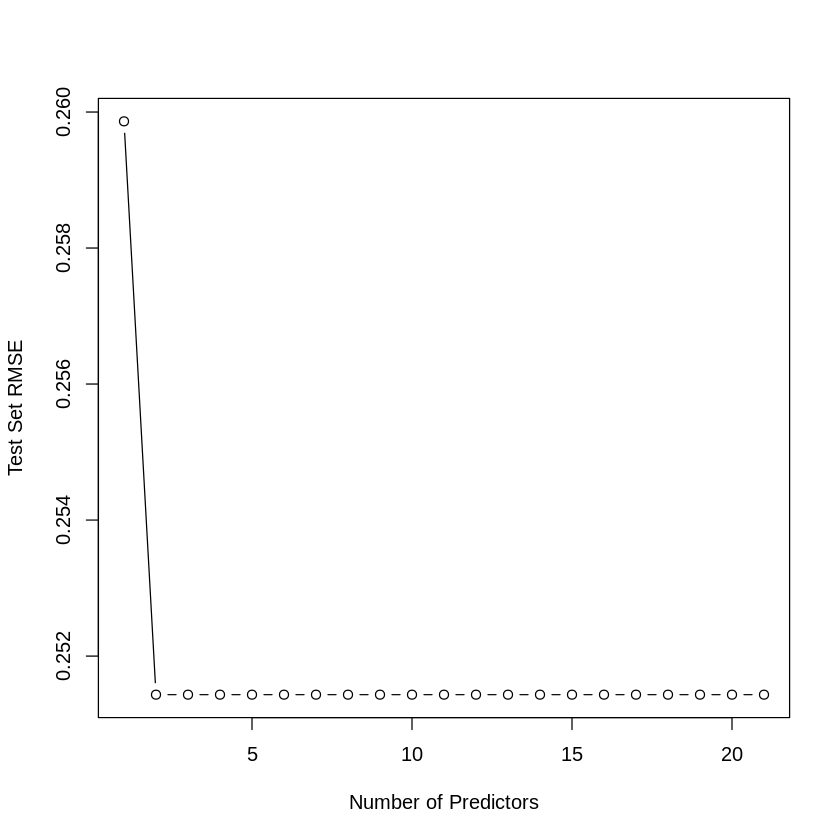

In [74]:
plot(test_err, type='b', ylab = "Test Set RMSE", xlab = "Number of Predictors")

In [75]:
which.min(test_err)
coef(fit.best, which.min(test_err))

[1] 2

(Intercept)          TSH          FTI 
 0.228573463  0.006033778 -0.001584894

In [76]:
pred.sub.best <- (0.228573463166211 + 0.00603377755926344*test5$TSH - 0.00158489357156893*test5$FTI)

In [77]:
range(pred.sub.best)

[1] -0.2324797  3.4130040

In [78]:
pred.labels.best <- ifelse(pred.sub.best > 0.5, 1, 0)
mean(pred.labels.best != test5$Hypo)

[1] 0.06321839

In [79]:
set.seed(8)
train.control <- trainControl(method = "cv", number = 10)

In [80]:
fit.stepwise <- caret::train(Hypo ~., data = train5,
                    method = "leapForward", 
                    tuneGrid = data.frame(nvmax = 1:21),
                    trControl = train.control
                    )

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”
Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


In [81]:
fit.stepwise$bestTune

,nvmax
,<int>
20,20


In [82]:
coef(fit.stepwise$finalModel, 20)

(Intercept)                Age             Female       On_thyroxine 
      0.1961998982      -0.0001049624       0.0325770026      -0.0455113329 
Query_on_thyroxine       On_anti_medi               Sick           Pregnant 
      0.0673055971      -0.0480976467       0.0167170546      -0.0675307541 
           Surgery     I131_treatment         Query_hypo        Query_hyper 
     -0.1408558286      -0.0564637799       0.0337114669       0.0296595763 
            Goitre              Tumor      Hypopituitary              Psych 
     -0.0926771560       0.0263830205      -0.2122433383      -0.0129296674 
               TSH                 T3                TT4                T4U 
      0.0059208726      -0.0142220954      -0.0005675194       0.0450638641 
               FTI 
     -0.0009729751

In [83]:
pred.sub.stepwise <- (0.196199898230397 - 0.00010496235894913*test5$Age + 0.0325770026104981*test5$Female - 0.0455113328512562*test5$On_thyroxine + 0.0673055970678609*test5$Query_hyper
    - 0.0480976467234133*test5$On_anti_medi + 0.0167170545845328*test5$Sick - 0.0675307540804285*test5$Pregnant - 0.140855828632709*test5$Surgery - 0.0564637798685928*test5$I131_treatment
    + 0.0337114668725447*test5$Query_hypo + 0.0296595763082006*test5$Query_hyper - 0.0926771560459485*test5$Goitre + 0.0263830204629494*test5$Tumor - 0.212243338268067*test5$Hypopituitary
    - 0.0129296674311257*test5$Psych + 0.00592087258096651*test5$TSH - 0.0142220954320492*test5$T3 - 0.000567519413473369*test5$TT4 + 0.0450638640941988*test5$T4U - 0.000972975055471919*test5$FTI)

In [84]:
range(pred.sub.stepwise)

[1] -0.340867  3.368728

In [85]:
pred.labels.stepwise <- ifelse(pred.sub.best > 0.5, 1, 0)
mean(pred.labels.stepwise != test5$Hypo)

[1] 0.06321839

In [86]:
train8 <- train5
train8 <- train8 %>%
  mutate(Agesq = Age^2) %>%
  mutate(Agecu = Age^3) %>%
  mutate(TSHsq = TSH^2) %>%
  mutate(TSHcu = TSH^3) %>%
  mutate(T3sq = T3^2) %>%
  mutate(T3cu = T3^3) %>%
  mutate(TT4sq = TT4^2) %>%
  mutate(TT4cu = TT4^3) %>%
  mutate(T4Usq = T4U^2) %>%
  mutate(T4Ucu = T4U^3) %>%
  mutate(FTIsq = FTI^2) %>%
  mutate(FTIcu = FTI^3)
test8 <- test5
test8 <- test8 %>%
  mutate(Agesq = Age^2) %>%
  mutate(Agecu = Age^3) %>%
  mutate(TSHsq = TSH^2) %>%
  mutate(TSHcu = TSH^3) %>%
  mutate(T3sq = T3^2) %>%
  mutate(T3cu = T3^3) %>%
  mutate(TT4sq = TT4^2) %>%
  mutate(TT4cu = TT4^3) %>%
  mutate(T4Usq = T4U^2) %>%
  mutate(T4Ucu = T4U^3) %>%
  mutate(FTIsq = FTI^2) %>%
  mutate(FTIcu = FTI^3)
str(train8)
str(test8)

tibble [1,947 × 34] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:1947] 41 70 80 66 68 84 71 59 28 63 ...
 $ Female            : num [1:1947] 1 1 1 1 0 1 1 1 0 1 ...
 $ On_thyroxine      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Pregnant          : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Lithium           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:1947] 0 0 0 1 0 1 0 0 0 0 ...
 $ Hypopituitary     : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : num [1:1947] 0 0 0 

In [87]:
fit.best.2 <- regsubsets(Hypo~., data = train8, nvmax = 33)
test_mat.2 = model.matrix(Hypo ~ ., data = test8) #
test_err.2 = rep(0, times = 33)
for (i in seq_along(test_err.2)) {
  coefs.2 = coef(fit.best.2, id = i)
  pred.2 = test_mat.2[, names(coefs.2)] %*% coefs.2
  pred.l.2 <- ifelse(pred.2 > 0.5, 1, 0)
  test_err.2[i] <- sqrt(mean((test8$Hypo - pred.l.2) ^ 2))
}
test_err.2

[1] 0.2598629 0.2514327 0.2110456 0.2110456 0.2076137 0.2110456 0.2110456
 [8] 0.2110456 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137
[15] 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137
[22] 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137
[29] 0.2076137 0.2076137 0.2076137 0.2076137 0.2076137

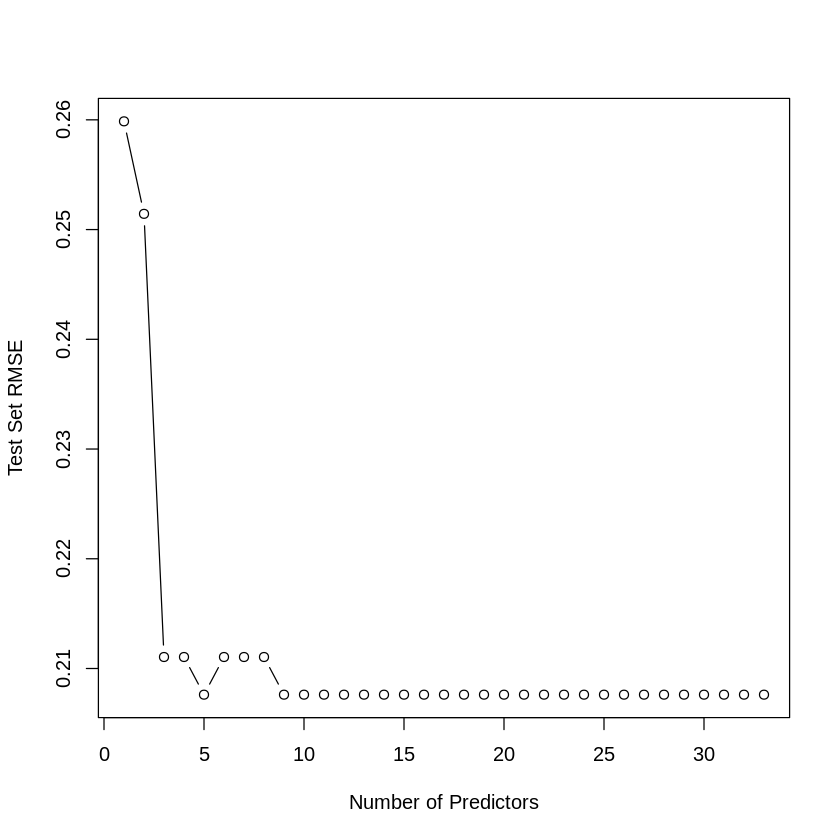

In [88]:
plot(test_err.2, type='b', ylab = "Test Set RMSE", xlab = "Number of Predictors")

In [89]:
which.min(test_err.2)
coef(fit.best.2, which.min(test_err.2))
coef(fit.best.2, 9)

[1] 5

(Intercept)  On_thyroxine       Surgery           TSH         TSHsq 
-1.008978e-02 -7.405254e-02 -1.687319e-01  3.598190e-02 -2.527400e-04 
        TSHcu 
 3.866206e-07

(Intercept)           Age        Female  On_thyroxine       Surgery 
-1.144012e-01  4.439849e-03  1.953406e-02 -7.997407e-02 -1.758487e-01 
          TSH         Agesq         Agecu         TSHsq         TSHcu 
 3.585955e-02 -5.103616e-05  9.130493e-08 -2.521910e-04  3.860463e-07

In [90]:
summary(fit.best.2)$rsq

[1] 0.2215187 0.3408132 0.5068167 0.5135720 0.5183935 0.5193322 0.5201861
 [8] 0.5209248 0.5217759 0.5226533 0.5234967 0.5238648 0.5241398 0.5245860
[15] 0.5249012 0.5252115 0.5254105 0.5257885 0.5261205 0.5264318 0.5267300
[22] 0.5268238 0.5268790 0.5269265 0.5269934 0.5270436 0.5270751 0.5271011
[29] 0.5271150 0.5271175 0.5271185 0.5271190 0.5271191

In [92]:
# Ridge & LASSO

In [93]:
train.x <- as.matrix(train5[,1:21])
train.y <- as.matrix(train5[,22])
test.x <- as.matrix(test5[,1:21])
test.y <- as.matrix(test5[,22])

In [94]:
set.seed(8)
cv.ridge <- cv.glmnet(train.x, train.y, alpha = 0)

In [95]:
names(cv.ridge)

[1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "call"       "name"       "glmnet.fit" "lambda.min"
[11] "lambda.1se" "index"

In [96]:
cv.ridge$lambda.min

[1] 0.0750572

In [97]:
coef(cv.ridge, s=cv.ridge$lambda.min)

22 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)         0.2040270032
Age                -0.0001032004
Female              0.0268402187
On_thyroxine       -0.0356386511
Query_on_thyroxine  0.0444535817
On_anti_medi       -0.0378653001
Sick                0.0124949511
Pregnant           -0.0492222799
Surgery            -0.0976411714
I131_treatment     -0.0435451365
Query_hypo          0.0310706097
Query_hyper         0.0212167893
Lithium            -0.0061914692
Goitre             -0.0747323582
Tumor               0.0199614760
Hypopituitary      -0.1542949845
Psych              -0.0129536852
TSH                 0.0046362855
T3                 -0.0148243130
TT4                -0.0006337445
T4U                 0.0452779408
FTI                -0.0008945497

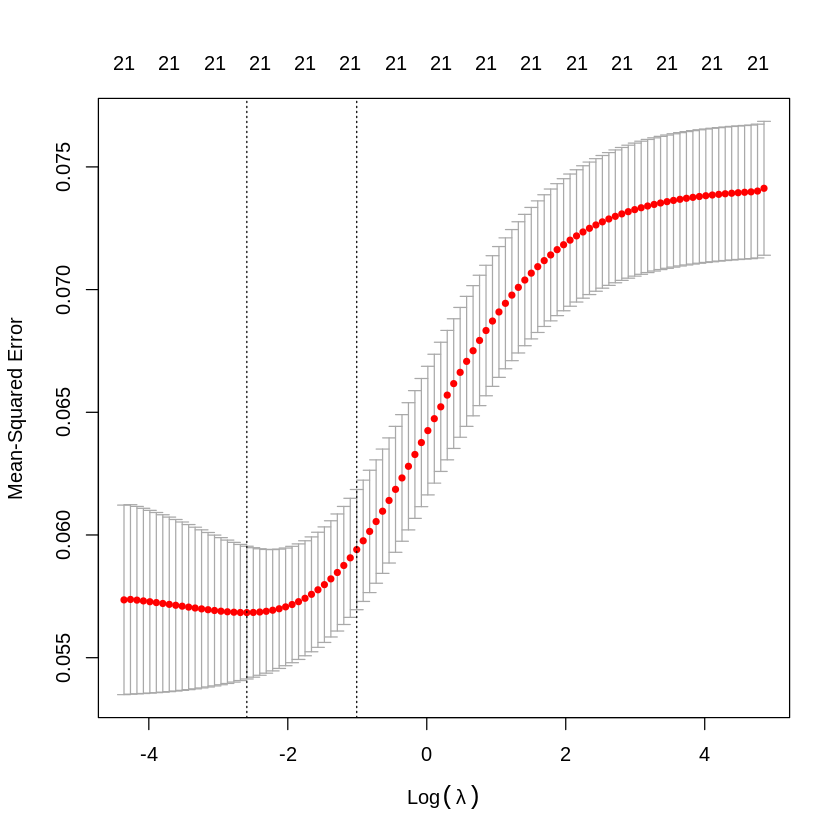

In [98]:
plot(cv.ridge)

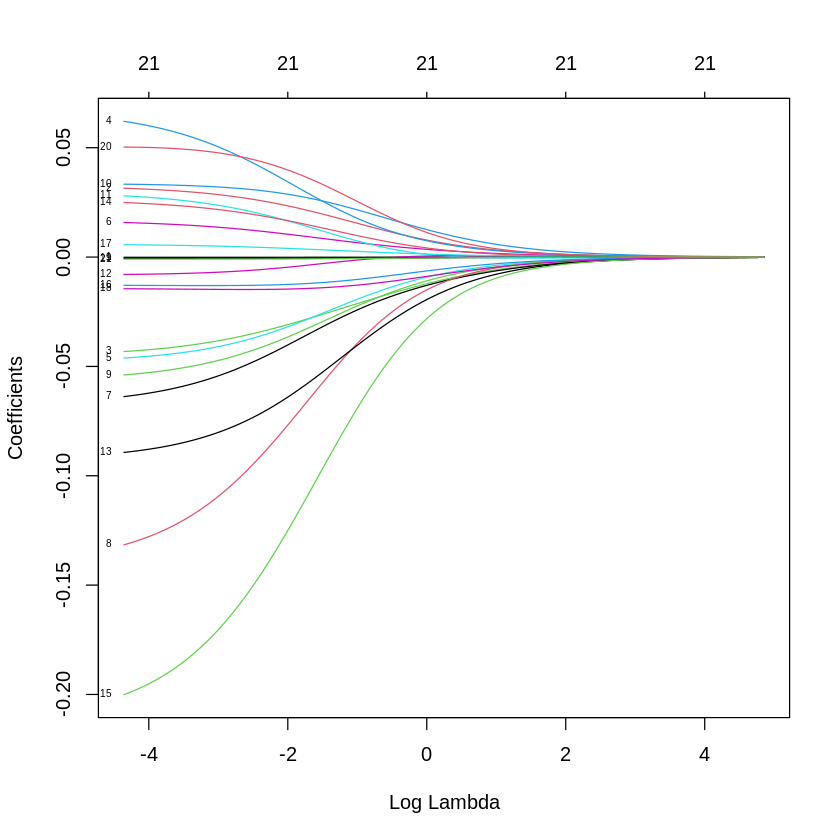

In [99]:
plot(cv.ridge$glmnet.fit, xvar="lambda", label=TRUE)

In [100]:
fit.ridge <- glmnet(train.x, train.y, lambda = cv.ridge$lambda.min, alpha = 0)

In [101]:
pred.ridge <- predict(fit.ridge, test.x, s = cv.ridge$lambda.min)

In [102]:
mean((pred.ridge - test.y)^2)

[1] 0.05601732

In [103]:
set.seed(8)
cv.lasso <- cv.glmnet(train.x, train.y, alpha=1)

In [104]:
cv.lasso$lambda.min

[1] 0.005948155

In [105]:
fit.lasso <- glmnet(train.x, train.y, lambda = cv.lasso$lambda.min, alpha = 1)
pred.lasso <- predict(fit.lasso, test.x, s = cv.lasso$lambda.min)
mean((pred.lasso - test.y)^2)

[1] 0.06209206

In [106]:
coef(cv.lasso, s = cv.lasso$lambda.min)

22 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)         0.2158100994
Age                 .           
Female              0.0202501611
On_thyroxine       -0.0275261347
Query_on_thyroxine  .           
On_anti_medi        .           
Sick                .           
Pregnant           -0.0043396020
Surgery            -0.0733071106
I131_treatment     -0.0020178460
Query_hypo          0.0071368329
Query_hyper         .           
Lithium             .           
Goitre             -0.0188092873
Tumor               .           
Hypopituitary       .           
Psych               .           
TSH                 0.0057632882
T3                 -0.0084280461
TT4                -0.0002689163
T4U                 .           
FTI                -0.0011279149

In [107]:
train6 <- train5
train6 <- train6^2
test6 <- test5
test6 <- test6^2
train6 <- train6 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
test6 <- test6 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
str(train6)
str(test6)

'data.frame':	1947 obs. of  6 variables:
 $ Age: num  1681 4900 6400 4356 4624 ...
 $ TSH: num  1.69 0.518 4.84 0.36 5.76 ...
 $ T3 : num  6.25 1.44 0.36 4.84 2.56 ...
 $ TT4: num  15625 3721 6400 15129 6889 ...
 $ T4U: num  1.3 0.757 0.49 0.865 0.792 ...
 $ FTI: num  11881 4900 13225 17424 8649 ...
'data.frame':	696 obs. of  6 variables:
 $ Age: num  3969 625 2809 8464 3600 ...
 $ TSH: num  12.25 21.16 0.0625 0.49 1.44 ...
 $ T3 : num  6.25 5.76 4.41 1.69 6.76 3.24 4.84 1.44 7.84 5.76 ...
 $ TT4: num  11664 3721 21025 14400 13689 ...
 $ T4U: num  0.922 0.672 1.061 0.706 1.716 ...
 $ FTI: num  12769 5625 19881 20449 8100 ...


In [108]:
train.x.2 <- as.matrix(train6)
test.x.2 <- as.matrix(test6)
train.x.3 <- cbind(train.x, train.x.2)
test.x.3 <- cbind(test.x, test.x.2)

In [109]:
set.seed(8)
cv.ridge.2 <- cv.glmnet(train.x.3, train.y, alpha=0)

In [110]:
cv.ridge.2$lambda.min

[1] 0.05173402

In [111]:
fit.ridge.2 <- glmnet(train.x.3, train.y, lambda = cv.ridge.2$lambda.min, alpha = 0)
pred.ridge.2 <- predict(fit.ridge.2, test.x.3, s = cv.ridge.2$lambda.min)
mean((pred.ridge.2 - test.y)^2)

[1] 0.0445892

In [112]:
set.seed(8)
cv.lasso.2 <- cv.glmnet(train.x.3, train.y, alpha=1)

In [113]:
cv.lasso.2$lambda.min

[1] 0.01816481

In [114]:
fit.lasso.2 <- glmnet(train.x.3, train.y, lambda = cv.lasso.2$lambda.min, alpha = 1)
pred.lasso.2 <- predict(fit.lasso.2, test.x.3, s = cv.lasso.2$lambda.min)
mean((pred.lasso.2 - test.y)^2)

[1] 0.04858257

In [115]:
coef(cv.lasso.2, s = cv.lasso.2$lambda.min)

28 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)         1.596703e-01
Age                 .           
Female              .           
On_thyroxine        .           
Query_on_thyroxine  .           
On_anti_medi        .           
Sick                .           
Pregnant            .           
Surgery             .           
I131_treatment      .           
Query_hypo          .           
Query_hyper         .           
Lithium             .           
Goitre              .           
Tumor               .           
Hypopituitary       .           
Psych               .           
TSH                 7.579912e-03
T3                  .           
TT4                -1.603799e-04
T4U                 .           
FTI                -8.326044e-04
Age                 .           
TSH                -8.849390e-06
T3                  .           
TT4                 .           
T4U                 .           
FTI                 .           

In [116]:
train7 <- train5
train7 <- train7^3
test7 <- test5
test7 <- test7^3
train7 <- train7 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
test7 <- test7 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
str(train7)
str(test7)

'data.frame':	1947 obs. of  6 variables:
 $ Age: num  68921 343000 512000 287496 314432 ...
 $ TSH: num  2.197 0.373 10.648 0.216 13.824 ...
 $ T3 : num  15.625 1.728 0.216 10.648 4.096 ...
 $ TT4: num  1953125 226981 512000 1860867 571787 ...
 $ T4U: num  1.482 0.659 0.343 0.804 0.705 ...
 $ FTI: num  1295029 343000 1520875 2299968 804357 ...
'data.frame':	696 obs. of  6 variables:
 $ Age: num  250047 15625 148877 778688 216000 ...
 $ TSH: num  42.875 97.336 0.0156 0.343 1.728 ...
 $ T3 : num  15.62 13.82 9.26 2.2 17.58 ...
 $ TT4: num  1259712 226981 3048625 1728000 1601613 ...
 $ T4U: num  0.885 0.551 1.093 0.593 2.248 ...
 $ FTI: num  1442897 421875 2803221 2924207 729000 ...


In [117]:
train.x.4 <- as.matrix(train7)
test.x.4 <- as.matrix(test7)
train.x.5 <- cbind(train.x.3, train.x.4)
test.x.5 <- cbind(test.x.3, test.x.4)

In [118]:
set.seed(8)
cv.lasso.3 <- cv.glmnet(train.x.5, train.y, alpha=1)

In [119]:
cv.lasso.3$lambda.min

[1] 0.003101373

In [120]:
fit.lasso.3 <- glmnet(train.x.5, train.y, lambda = cv.lasso.3$lambda.min, alpha = 1)
pred.lasso.3 <- predict(fit.lasso.3, test.x.5, s = cv.lasso.3$lambda.min)
mean((pred.lasso.3 - test.y)^2)

[1] 0.03644884

In [121]:
coef(cv.lasso.3, s = cv.lasso.3$lambda.min)

34 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)         1.093458e-01
Age                 .           
Female              1.888136e-02
On_thyroxine       -5.138773e-02
Query_on_thyroxine  3.300916e-02
On_anti_medi       -2.564745e-03
Sick                1.320954e-02
Pregnant           -4.491794e-03
Surgery            -1.375826e-01
I131_treatment     -2.614894e-02
Query_hypo          .           
Query_hyper         .           
Lithium             .           
Goitre             -2.209637e-02
Tumor               8.357915e-03
Hypopituitary       .           
Psych               .           
TSH                 1.956467e-02
T3                 -6.319528e-03
TT4                -1.194132e-04
T4U                 .           
FTI                -6.963399e-04
Age                 .           
TSH                -9.637029e-05
T3                  .           
TT4                 .           
T4U                 .           
FTI                 .           
A

In [123]:
# Poly Logit

In [125]:
train9 <- train8
test9 <- test8
train9$Hypo <- factor(train9$Hypo)
test9$Hypo <- factor(test9$Hypo)
logit4 <- glm(Hypo~Female+On_thyroxine+Query_on_thyroxine+On_anti_medi+Sick+Pregnant+Surgery+I131_treatment+Goitre+Tumor+TSH+T3+TT4+FTI+TSHsq+TSHcu+FTIcu, data = train9, family = "binomial")
summary(logit4)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ Female + On_thyroxine + Query_on_thyroxine + 
    On_anti_medi + Sick + Pregnant + Surgery + I131_treatment + 
    Goitre + Tumor + TSH + T3 + TT4 + FTI + TSHsq + TSHcu + FTIcu, 
    family = "binomial", data = train9)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
                     Estimate Std. Error    z value Pr(>|z|)    
(Intercept)        -7.872e+14  1.074e+07  -73286629   <2e-16 ***
Female              1.815e+14  3.354e+06   54104773   <2e-16 ***
On_thyroxine       -3.527e+15  5.406e+06 -652521543   <2e-16 ***
Query_on_thyroxine  1.837e+14  1.599e+07   11484209   <2e-16 ***
On_anti_medi       -2.725e+14  1.341e+07  -20320735   <2e-16 ***
Sick               -1.027e+14  7.300e+06  -14065045   <2e-16 ***
Pregnant            3.543e+14  1.293e+07   27399816   <2e-16 ***
Surgery            -6.842e+15  1.362e+07 -502304543   <2e-16 ***
I131_treatment     -2.855e+14  1.202e+07  -237562

In [126]:
pred.logit4 <- predict(logit4, newdata = test9, type = "response")

In [127]:
range(pred.logit4)

[1] 2.220446e-16 1.000000e+00

In [128]:
pred.labels4 = ifelse(pred.logit4 > 0.5, 1, 0) 
pred.labels4 = as.factor(pred.labels4)
head(pred.labels4)

1 2 3 4 5 6 
0 0 0 0 0 1 
Levels: 0 1

In [129]:
confusionMatrix(pred.labels4, test9$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 632   8
         1   5  51
                                        
               Accuracy : 0.9813        
                 95% CI : (0.9683, 0.99)
    No Information Rate : 0.9152        
    P-Value [Acc > NIR] : 1.001e-13     
                                        
                  Kappa : 0.8768        
                                        
 Mcnemar's Test P-Value : 0.5791        
                                        
            Sensitivity : 0.9922        
            Specificity : 0.8644        
         Pos Pred Value : 0.9875        
         Neg Pred Value : 0.9107        
             Prevalence : 0.9152        
         Detection Rate : 0.9080        
   Detection Prevalence : 0.9195        
      Balanced Accuracy : 0.9283        
                                        
       'Positive' Class : 0             
                                        

In [130]:
(logit.test.err <- mean(pred.labels4 != test9$Hypo, na.rm = TRUE))

[1] 0.01867816

In [131]:
train10 <- train9
test10 <- test9
train10 <- train10 %>%
  dplyr::select(-c(Agecu, TSHcu, T3cu, TT4cu, T4Ucu, FTIcu))
test10 <- test10 %>%
  dplyr::select(-c(Agecu, TSHcu, T3cu, TT4cu, T4Ucu, FTIcu))
logit5 <- glm(Hypo~., data = train10, family = "binomial")
summary(logit5)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ ., family = "binomial", data = train10)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.1471  -0.0862  -0.0111   5.8323  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         5.111e+01  1.591e+01   3.213 0.001313 ** 
Age                 4.525e-02  5.102e-02   0.887 0.375192    
Female              3.550e-01  3.797e-01   0.935 0.349783    
On_thyroxine       -2.222e+01  3.491e+00  -6.364 1.96e-10 ***
Query_on_thyroxine -2.299e-01  1.581e+00  -0.145 0.884354    
On_anti_medi       -4.579e-01  1.404e+00  -0.326 0.744324    
Sick               -5.994e-02  6.872e-01  -0.087 0.930496    
Pregnant           -1.493e+01  2.404e+03  -0.006 0.995046    
Surgery            -6.296e+01  6.119e+00 -10.290  < 2e-16 ***
I131_treatment     -1.336e+01  5.207e+02  -0.026 0.979529    
Query_hypo          2.196e-01  7.081e-01   0.310 0.756429    
Query_hyper         3.391e-01  8.350e-01   0.406 0.684669  

In [132]:
pred.logit5 <- predict(logit5, newdata = test10, type = "response")

In [133]:
pred.labels5 = ifelse(pred.logit5 > 0.5, 1, 0) 
pred.labels5 = as.factor(pred.labels5)
head(pred.labels5)

1 2 3 4 5 6 
0 0 0 0 0 1 
Levels: 0 1

In [134]:
confusionMatrix(pred.labels5, test10$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 635   9
         1   2  50
                                          
               Accuracy : 0.9842          
                 95% CI : (0.9719, 0.9921)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : 3.739e-15       
                                          
                  Kappa : 0.8924          
                                          
 Mcnemar's Test P-Value : 0.07044         
                                          
            Sensitivity : 0.9969          
            Specificity : 0.8475          
         Pos Pred Value : 0.9860          
         Neg Pred Value : 0.9615          
             Prevalence : 0.9152          
         Detection Rate : 0.9124          
   Detection Prevalence : 0.9253          
      Balanced Accuracy : 0.9222          
                                          
       'Positive' Class : 0               
                              

In [135]:
(logit.test.err <- mean(pred.labels5 != test10$Hypo, na.rm = TRUE))

[1] 0.0158046

In [136]:
logit6 <- glm(Hypo~On_thyroxine+Surgery+TSH+TT4+T4U+FTI+TSHsq+TT4sq+T4Usq+FTIsq, data = train10, family = "binomial")
summary(logit6)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hypo ~ On_thyroxine + Surgery + TSH + TT4 + T4U + 
    FTI + TSHsq + TT4sq + T4Usq + FTIsq, family = "binomial", 
    data = train10)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.0183  -0.0064  -0.0013   8.4904  

Coefficients:
               Estimate Std. Error    z value Pr(>|z|)    
(Intercept)   4.893e+01  2.283e+01  2.143e+00  0.03207 *  
On_thyroxine -6.203e+01  9.313e+00 -6.661e+00 2.72e-11 ***
Surgery      -3.062e+15  1.342e+07 -2.282e+08  < 2e-16 ***
TSH           1.997e+00  2.814e-01  7.098e+00 1.26e-12 ***
TT4           1.005e+00  3.380e-01  2.973e+00  0.00295 ** 
T4U          -8.870e+01  3.513e+01 -2.525e+00  0.01158 *  
FTI          -8.070e-01  2.720e-01 -2.967e+00  0.00300 ** 
TSHsq        -4.150e-03  5.877e-04 -7.061e+00 1.66e-12 ***
TT4sq        -2.442e-03  7.684e-04 -3.178e+00  0.00148 ** 
T4Usq         1.780e+01  8.755e+00  2.033e+00  0.04205 *  
FTIsq         1.460e-03  4.415e-04  3.308e+00  0.00094 ***
---
Sign

In [137]:
pred.logit6 <- predict(logit6, newdata = test10, type = "response")

In [138]:
pred.labels6 = ifelse(pred.logit6 > 0.5, 1, 0) 
pred.labels6 = as.factor(pred.labels6)
head(pred.labels6)

1 2 3 4 5 6 
0 0 0 0 0 1 
Levels: 0 1

In [139]:
confusionMatrix(pred.labels6, test10$Hypo)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 634   6
         1   3  53
                                          
               Accuracy : 0.9871          
                 95% CI : (0.9756, 0.9941)
    No Information Rate : 0.9152          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9147          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9953          
            Specificity : 0.8983          
         Pos Pred Value : 0.9906          
         Neg Pred Value : 0.9464          
             Prevalence : 0.9152          
         Detection Rate : 0.9109          
   Detection Prevalence : 0.9195          
      Balanced Accuracy : 0.9468          
                                          
       'Positive' Class : 0               
                              

In [140]:
(logit.test.err <- mean(pred.labels6 != test10$Hypo, na.rm = TRUE))

[1] 0.01293103

In [ ]:
# Trees & RF

In [141]:
set.seed(8)
fit.base.tree <- rpart(Hypo~., data = train3,  method = "class", parm = list(split="gini"),
                      control = list(cp = 0))
fit.base.tree

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1947 157 0 (0.9193631228 0.0806368772)  
   2) TSH< 6.05 1755   1 0 (0.9994301994 0.0005698006) *
   3) TSH>=6.05 192  36 1 (0.1875000000 0.8125000000)  
     6) On_thyroxine=1 28   3 0 (0.8928571429 0.1071428571) *
     7) On_thyroxine=0 164  11 1 (0.0670731707 0.9329268293)  
      14) Surgery=1 7   1 0 (0.8571428571 0.1428571429) *
      15) Surgery=0 157   5 1 (0.0318471338 0.9681528662) *

In [143]:
grid <- expand.grid(
  minsplit = seq(5, 50, 1),
  maxdepth = seq(2, 10, 1)
)

In [144]:
set.seed(8)
models <- list()
for (i in 1:nrow(grid)) {

  # get the values of minsplit, maxdepth values at row i from the grid data frame
  ms <- grid$minsplit[i]
  md <- grid$maxdepth[i]
  # train a model and store in the list

  models[[i]] <- rpart(
    formula = Hypo ~ .,
    data   = train3,
    method  = "class",
    control = list(minsplit = ms, maxdepth = md)
    )
}

In [145]:
# function to get optimal cp
get_cp <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  cp <- x$cptable[min, "CP"] 
}

# function to get minimum error
get_min_error <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  xerror <- x$cptable[min, "xerror"] 
}

grid %>%
  mutate(
    cp    = purrr::map_dbl(models, get_cp), # The map_dbl functions transform their
    #input by applying a function to each element and return vectors of the corresponding type.
    error = purrr::map_dbl(models, get_min_error)
    ) %>%
  arrange(error) %>%
  top_n(3, wt = error) # To take to top 3 combinations

minsplit,maxdepth,cp,error
<dbl>,<dbl>,<dbl>,<dbl>
5,2,0.01000000,0.0955414
6,2,0.01000000,0.0955414
7,2,0.01000000,0.0955414
8,2,0.01000000,0.0955414
9,2,0.01000000,0.0955414
10,2,0.01000000,0.0955414
11,2,0.01000000,0.0955414
12,2,0.01000000,0.0955414
13,2,0.01000000,0.0955414


In [146]:
set.seed(8)
fit.optimal.tree1 <- rpart(
    formula = Hypo ~ .,
    data    = train3,
    method  = "class",
    control = list(minsplit = 5, maxdepth = 2, cp = .01)
    )
fit.optimal.tree1

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 1947 157 0 (0.9193631228 0.0806368772)  
  2) TSH< 6.05 1755   1 0 (0.9994301994 0.0005698006) *
  3) TSH>=6.05 192  36 1 (0.1875000000 0.8125000000)  
    6) On_thyroxine=1 28   3 0 (0.8928571429 0.1071428571) *
    7) On_thyroxine=0 164  11 1 (0.0670731707 0.9329268293) *

In [147]:
#Train error for fit.base.tree
predictions.dt.train.base <- predict(fit.base.tree, type = "class")
train.err.base <- mean(predictions.dt.train.base != train3$Hypo)
#Train error for fit.optimal.tree
predictions.dt.train.optimal <- predict(fit.optimal.tree1, type = "class")
train.err.optimal <- mean(predictions.dt.train.optimal != train3$Hypo)

#Test error for fit.base.tree
predictions.dt.test.base <- predict(fit.base.tree, newdata = test3, type = "class")
test.err.base <- mean(predictions.dt.test.base != test3$Hypo)
#Train error for fit.optimal.tree
predictions.dt.test.optimal <- predict(fit.optimal.tree1, newdata = test3, type = "class")
test.err.optimal <- mean(predictions.dt.test.optimal != test3$Hypo)

compare <- data.frame(Train_Error_Base = train.err.base,
            Test_Error_Base = test.err.base,
            Train_Error_Optimal = train.err.optimal,
            Test_Error_Optimal = test.err.optimal)

compare

Train_Error_Base,Test_Error_Base,Train_Error_Optimal,Test_Error_Optimal
<dbl>,<dbl>,<dbl>,<dbl>
0.005136107,0.01293103,0.00770416,0.01436782


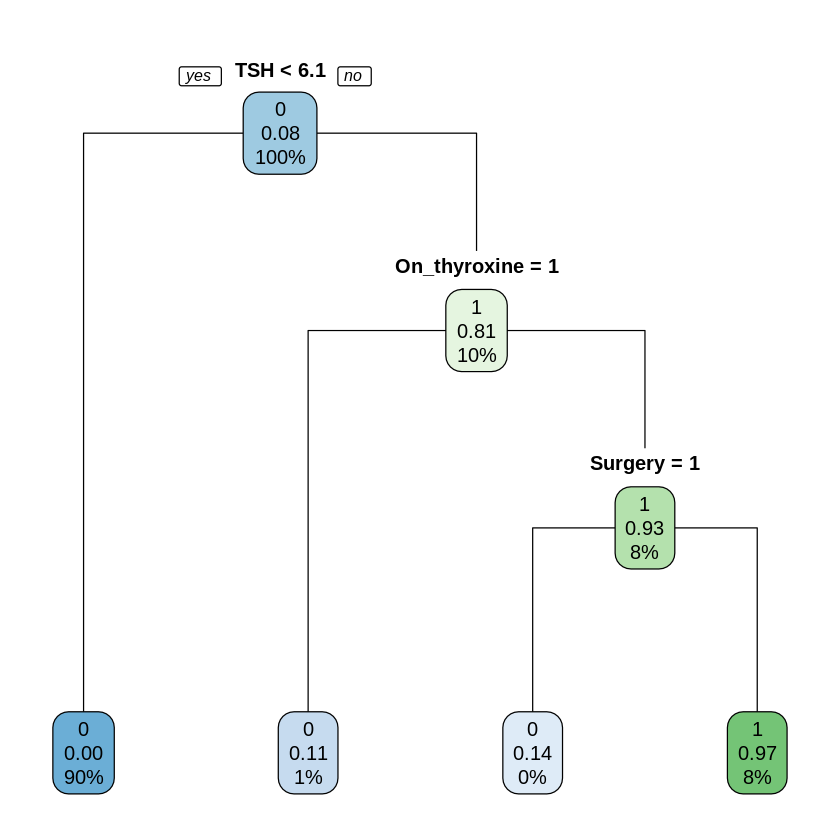

In [148]:
rpart.plot(fit.base.tree, type = 1)

In [149]:
set.seed(8)
fit.base.tree.post <- rpart(Hypo~., data = train3,  method = "class", parm= list(split="gini"), control = list(cp = 0))
fit.base.tree.post

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1947 157 0 (0.9193631228 0.0806368772)  
   2) TSH< 6.05 1755   1 0 (0.9994301994 0.0005698006) *
   3) TSH>=6.05 192  36 1 (0.1875000000 0.8125000000)  
     6) On_thyroxine=1 28   3 0 (0.8928571429 0.1071428571) *
     7) On_thyroxine=0 164  11 1 (0.0670731707 0.9329268293)  
      14) Surgery=1 7   1 0 (0.8571428571 0.1428571429) *
      15) Surgery=0 157   5 1 (0.0318471338 0.9681528662) *

In [150]:
printcp(fit.base.tree.post)


Classification tree:
rpart(formula = Hypo ~ ., data = train3, method = "class", parms = list(split = "gini"), 
    control = list(cp = 0))

Variables actually used in tree construction:
[1] On_thyroxine Surgery      TSH         

Root node error: 157/1947 = 0.080637

n= 1947 

        CP nsplit rel error   xerror     xstd
1 0.764331      0  1.000000 1.000000 0.076523
2 0.140127      1  0.235669 0.235669 0.038374
3 0.031847      2  0.095541 0.095541 0.024573
4 0.000000      3  0.063694 0.095541 0.024573


In [151]:
tree.pruned <- prune(fit.base.tree.post, cp = 0.031847)

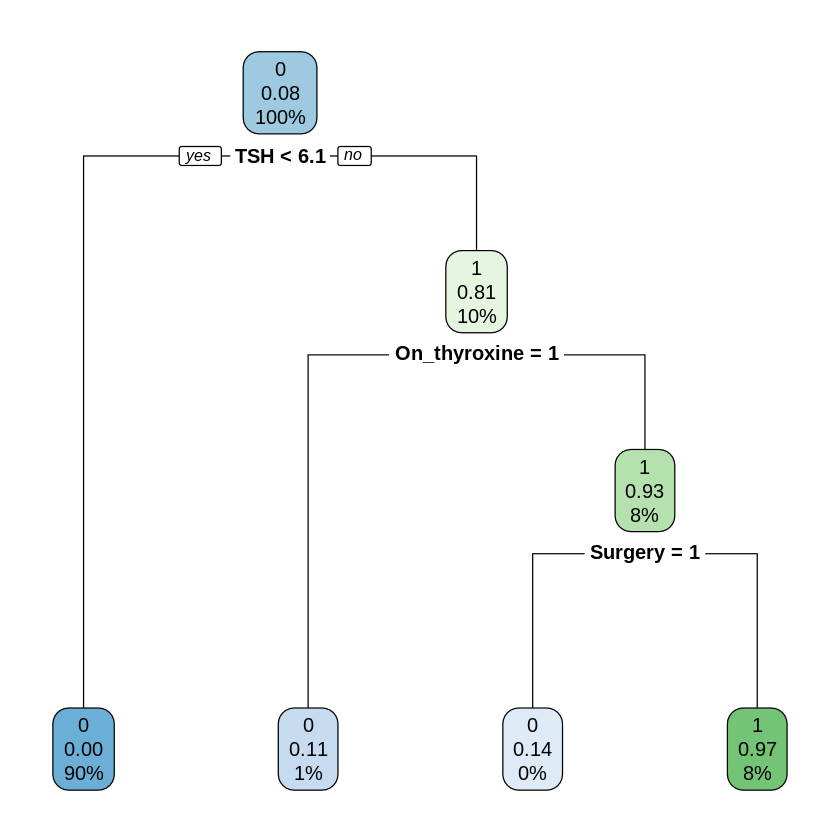

In [152]:
rpart.plot(tree.pruned)

In [153]:
train_x <- train3 %>% dplyr::select(-Hypo)
train_y <- train3$Hypo

mtry = 4  OOB error = 0.82% 
Searching left ...
mtry = 2 	OOB error = 1.85% 
-1.25 0.05 
Searching right ...
mtry = 8 	OOB error = 0.62% 
0.25 0.05 
mtry = 16 	OOB error = 0.26% 
0.5833333 0.05 
mtry = 21 	OOB error = 0.36% 
-0.4 0.05 


,mtry,OOBError
2.OOB,2,0.018489985
4.OOB,4,0.008217771
8.OOB,8,0.006163328
16.OOB,16,0.002568053
21.OOB,21,0.003595275


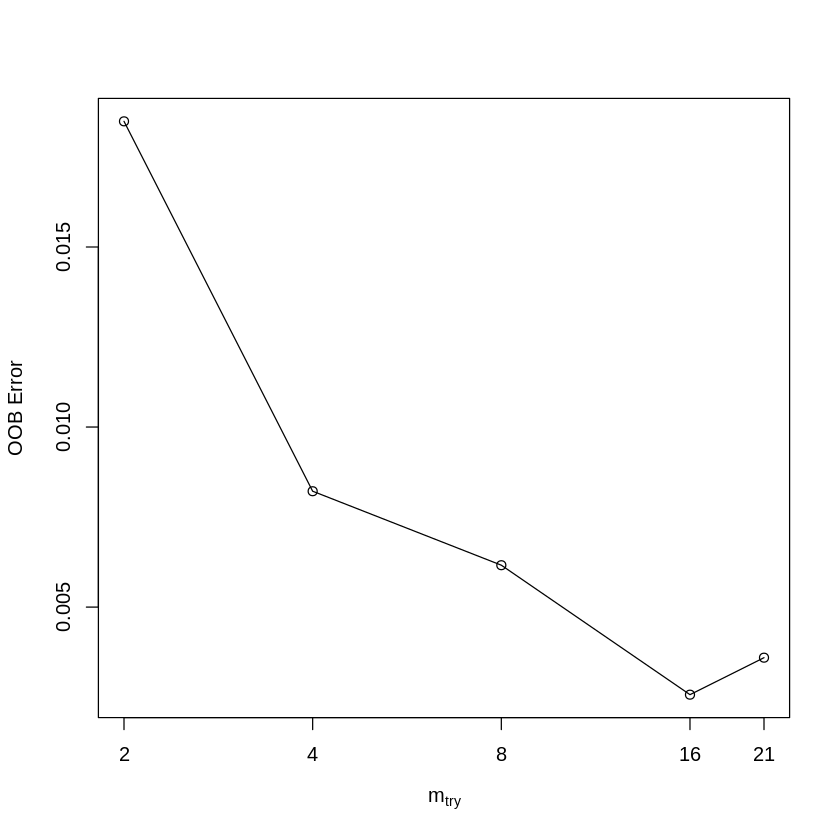

In [154]:
set.seed(8)
tuneRF(train_x, train_y, ntreeTry = 100)

In [155]:
set.seed(8)
fit.rf <- randomForest(Hypo~., data = train3, ntree = 100, mtry = 16)
fit.rf


Call:
 randomForest(formula = Hypo ~ ., data = train3, ntree = 100,      mtry = 16) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 16

        OOB estimate of  error rate: 0.31%
Confusion matrix:
     0   1 class.error
0 1786   4 0.002234637
1    2 155 0.012738854

In [156]:
predictions.rf <- predict(fit.rf, newdata = test3, type = "class")
confusion.matrix.rf <- confusionMatrix(predictions.rf, test3$Hypo)
confusion.matrix.rf$overall[["Accuracy"]]

[1] 1

In [161]:
x <- train10 %>% dplyr::select(-Hypo)
y <- train10$Hypo

mtry = 5  OOB error = 0.67% 
Searching left ...
mtry = 3 	OOB error = 0.87% 
-0.3076923 0.05 
Searching right ...
mtry = 10 	OOB error = 0.41% 
0.3846154 0.05 
mtry = 20 	OOB error = 0.21% 
0.5 0.05 
mtry = 27 	OOB error = 0.26% 
-0.25 0.05 


,mtry,OOBError
3.OOB,3,0.008731382
5.OOB,5,0.006676939
10.OOB,10,0.004108885
20.OOB,20,0.002054443
27.OOB,27,0.002568053


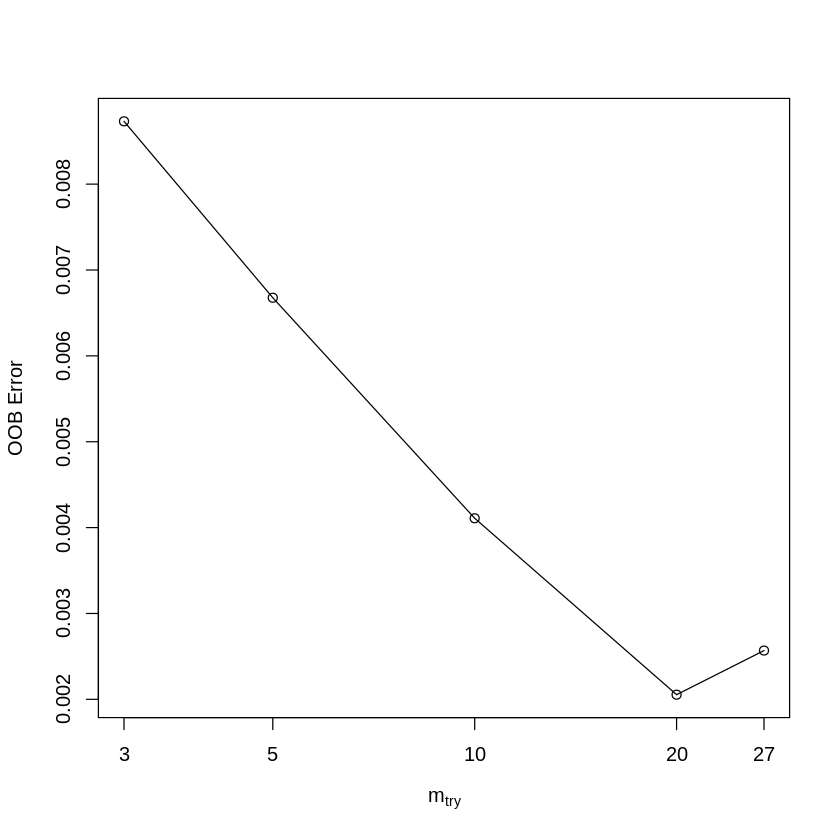

In [162]:
set.seed(8)
tuneRF(x, y, ntreeTry = 100)

In [163]:
set.seed(8)
fit.rf2 <- randomForest(Hypo~On_thyroxine+Surgery+TSH+TT4+T4U+FTI+TSHsq+TT4sq+T4Usq+FTIsq, data = train10, ntree = 100, mtry = 20)
fit.rf2

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”



Call:
 randomForest(formula = Hypo ~ On_thyroxine + Surgery + TSH +      TT4 + T4U + FTI + TSHsq + TT4sq + T4Usq + FTIsq, data = train10,      ntree = 100, mtry = 20) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 10

        OOB estimate of  error rate: 0.41%
Confusion matrix:
     0   1 class.error
0 1785   5 0.002793296
1    3 154 0.019108280

In [164]:
predictions.rf2 <- predict(fit.rf2, newdata = test10, type = "class")
confusion.matrix.rf2 <- confusionMatrix(predictions.rf2, test10$Hypo)
confusion.matrix.rf2$overall[["Accuracy"]]

[1] 0.9985632

In [ ]:
# SVM

In [157]:
set.seed(8)
fit.tuned <- tune(svm, Hypo~.,data = train3, kernel = "radial", ranges = list(cost = c(.001, .01,0.1,1,10,100,1000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)))

In [158]:
fit.tuned$best.parameters

,cost,gamma
,<dbl>,<dbl>
7,1000,0.01


In [159]:
fit.svm <- svm(Hypo~., data = train3, kernel = "radial", cost = 1000, gamma = 0.01)
summary(fit.svm)


Call:
svm(formula = Hypo ~ ., data = train3, kernel = "radial", cost = 1000, 
    gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  112

 ( 59 53 )


Number of Classes:  2 

Levels: 
 0 1




In [160]:
pred.svm <- predict(fit.svm, test3)
mean(pred.svm != test3$Hypo)

[1] 0.01724138

In [165]:
set.seed(8)
fit.tuned2 <- tune(svm, Hypo~.,data = train3, kernel = "linear", ranges = list(cost = c(.001, .01,0.1,1,10,100,1000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)))

In [166]:
fit.tuned2$best.parameters

,cost,gamma
,<dbl>,<dbl>
7,1000,0.01


In [167]:
fit.svm2 <- svm(Hypo~., data = train3, kernel = "linear", cost = 1000, gamma = 0.01)
summary(fit.svm2)


Call:
svm(formula = Hypo ~ ., data = train3, kernel = "linear", cost = 1000, 
    gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1000 

Number of Support Vectors:  136

 ( 70 66 )


Number of Classes:  2 

Levels: 
 0 1




In [168]:
pred.svm2 <- predict(fit.svm2, test3)
mean(pred.svm2 != test3$Hypo)

[1] 0.0158046